## Detection of Face Mask

### Task Completed by Reshmika Dhandapani

In [1]:
import cv2
import os
import numpy as np
from keras.utils import np_utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from sklearn.model_selection import 

from matplotlib import pyplot as plt

Using TensorFlow backend.


### Code for Training model with face mask images

In [2]:
print("Images with facemask:",len(os.listdir('data/with_mask')))
print("Images without facemask",len(os.listdir('data/without_mask')))

Images with facemask: 690
Images without facemask 686


In [3]:
dir_ = 'data'
classes = os.listdir(dir_)
labels = [i for i in range(len(classes))]
label_dict = dict(zip(classes, labels))
image = []
label = []

for c in classes:
    folder_dir = os.path.join(dir_, c)
    img_names = os.listdir(folder_dir)    
    for i in img_names:
        img_path = os.path.join(folder_dir, i)
        img = cv2.imread(img_path)
        
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray,(224, 224))
            image.append(resized)
            label.append(label_dict[c])            
        except Exception as e:
            print('Exception:', e)

In [4]:
from keras.utils import np_utils
np_image_list = np.array(image, dtype="float32") / 255.0
np_image_list= np.reshape(np_image_list,(np_image_list.shape[0], 100,100, 1))
label = np.asarray(label)
labels = np_utils.to_categorical(label)

img_size = len(image)
print(img_size) 

In [6]:
X_train,X_val,y_train,y_val=train_test_split(np_image_list,labels,test_size=0.10)

print("X_train shape",X_train.shape)
print("X_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

X_train shape (1238, 100, 100, 1)
X_val shape (138, 100, 100, 1)
y_train shape (1238, 2)
y_val shape (138, 2)


In [7]:
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,
                         width_shift_range=0.2,height_shift_range=0.2,
                         shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

In [8]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            

In [9]:
INIT_LR = 1e-4
EPOCHS = 15
BS = 32

H = model.fit( aug.flow(X_train,y_train, batch_size=BS),steps_per_epoch=len(X_train) // BS,
              validation_data=(X_val,y_val),validation_steps=len(X_val) // BS, epochs=EPOCHS)

Epoch 1/15
38/38 [==============================] - 102s 3s/step - loss: 0.7065 - accuracy: 0.5506 - val_loss: 0.6985 - val_accuracy: 0.4928
Epoch 2/15
38/38 [==============================] - 93s 2s/step - loss: 0.6364 - accuracy: 0.6310 - val_loss: 0.6006 - val_accuracy: 0.6957
Epoch 3/15
38/38 [==============================] - 104s 3s/step - loss: 0.5749 - accuracy: 0.7123 - val_loss: 0.4779 - val_accuracy: 0.7754
Epoch 4/15
38/38 [==============================] - 104s 3s/step - loss: 0.4601 - accuracy: 0.7919 - val_loss: 0.4599 - val_accuracy: 0.7681
Epoch 5/15
38/38 [==============================] - 90s 2s/step - loss: 0.4395 - accuracy: 0.8076 - val_loss: 0.3563 - val_accuracy: 0.8696
Epoch 6/15
38/38 [==============================] - 89s 2s/step - loss: 0.4180 - accuracy: 0.8151 - val_loss: 0.2928 - val_accuracy: 0.9348
Epoch 7/15
38/38 [==============================] - 89s 2s/step - loss: 0.3789 - accuracy: 0.8344 - val_loss: 0.2640 - val_accuracy: 0.9058
Epoch 8/15
38/38 

In [10]:
scores = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {scores[1]*100}")

138/138 [==============================] - 5s 39ms/step
Validation Accuracy: 95.652174949646


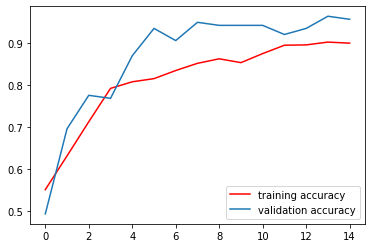

In [14]:
plt.plot(model.history.history['accuracy'],'r',label='training accuracy')
plt.plot(model.history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()

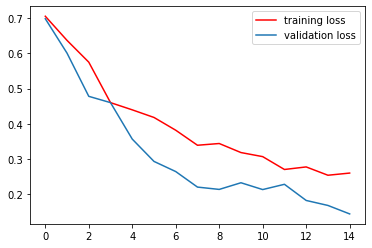

In [15]:
plt.plot(model.history.history['loss'],'r',label='training loss')
plt.plot(model.history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

In [16]:
model.save('cnn_model.model')